# Reconstruction of DOSY NMR signals - Part I

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import random

## 1) Generation of synthetic data


$\underline{\textbf{Q1.}}$ Let's read the signal data from the file "signal.dat" 

In [2]:
N = 200
signal = np.zeros(N)

filepath = 'signal.txt'  
with open(filepath) as fp:  
    line = fp.readline()
    cnt = 1
    while line:
        signal[cnt-1] = np.float64(line)
        line = fp.readline()
        cnt += 1
    
signal

array([2.0440461e-15, 9.5346375e-15, 4.2731280e-14, 1.8399916e-13,
       7.6122670e-13, 3.0258013e-12, 1.1555667e-11, 4.2401169e-11,
       1.4948199e-10, 5.0632357e-10, 1.6477664e-09, 5.1521838e-09,
       1.5478015e-08, 4.4675295e-08, 1.2389329e-07, 3.3010826e-07,
       8.4507101e-07, 2.0785393e-06, 4.9119223e-06, 1.1152519e-05,
       2.4328910e-05, 5.0991828e-05, 1.0268493e-04, 1.9867402e-04,
       3.6932070e-04, 6.5962097e-04, 1.1319141e-03, 1.8662109e-03,
       2.9562161e-03, 4.4992472e-03, 6.5791799e-03, 9.2434029e-03,
       1.2477289e-02, 1.6182171e-02, 2.0164227e-02, 2.4140963e-02,
       2.7768717e-02, 3.0689178e-02, 3.2586891e-02, 3.3245190e-02,
       3.2586892e-02, 3.0689180e-02, 2.7768719e-02, 2.4140966e-02,
       2.0164233e-02, 1.6182182e-02, 1.2477307e-02, 9.2434342e-03,
       6.5792322e-03, 4.4993339e-03, 2.9563583e-03, 1.8664419e-03,
       1.1322857e-03, 6.6021251e-04, 3.7025309e-04, 2.0012899e-04,
       1.0493282e-04, 5.4430173e-05, 2.9535840e-05, 1.8959282e

$\underline{\textbf{Q2.}}$  We create first T using an exponential sampling strategy:

In [3]:
T_min = 1 
T_max = 1000
T = np.array([T_min*np.exp(-n*(np.log(T_min/T_max))/(N-1)) for n in range(N)],dtype=np.float64)
T

array([   1.        ,    1.03532184,    1.07189132,    1.1097525 ,
          1.148951  ,    1.18953407,    1.2315506 ,    1.27505124,
          1.3200884 ,    1.36671636,    1.4149913 ,    1.4649714 ,
          1.51671689,    1.57029012,    1.62575567,    1.68318035,
          1.74263339,    1.80418641,    1.8679136 ,    1.93389175,
          2.00220037,    2.07292178,    2.1461412 ,    2.22194686,
          2.30043012,    2.38168555,    2.46581108,    2.55290807,
          2.64308149,    2.73644   ,    2.8330961 ,    2.93316628,
          3.03677112,    3.14403547,    3.2550886 ,    3.37006433,
          3.48910121,    3.6123427 ,    3.7399373 ,    3.87203878,
          4.00880633,    4.15040476,    4.2970047 ,    4.44878283,
          4.60592204,    4.7686117 ,    4.93704785,    5.11143348,
          5.29197874,    5.47890118,    5.67242607,    5.87278661,
          6.08022426,    6.29498899,    6.5173396 ,    6.74754405,
          6.98587975,    7.2326339 ,    7.48810386,    7.75259

$\underline{\textbf{Q3.}}$ Display the original signal $\bar{x}$ as a function of T

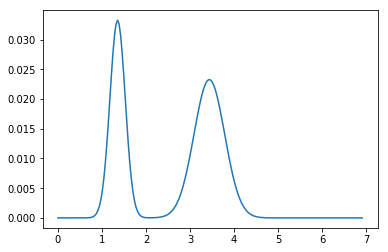

In [4]:
plt.plot(np.log(T),signal)

$\underline{\textbf{Q4.}}$  Create t using a regular sampling strategy 

In [5]:
M = 50 
t_min = 0
t_max = 1.5
t = np.array([t_min + ((m-1)/(M-1))*(t_max - t_min) for m in range(1,M+1)],dtype=np.float64)
t

array([0.        , 0.03061224, 0.06122449, 0.09183673, 0.12244898,
       0.15306122, 0.18367347, 0.21428571, 0.24489796, 0.2755102 ,
       0.30612245, 0.33673469, 0.36734694, 0.39795918, 0.42857143,
       0.45918367, 0.48979592, 0.52040816, 0.55102041, 0.58163265,
       0.6122449 , 0.64285714, 0.67346939, 0.70408163, 0.73469388,
       0.76530612, 0.79591837, 0.82653061, 0.85714286, 0.8877551 ,
       0.91836735, 0.94897959, 0.97959184, 1.01020408, 1.04081633,
       1.07142857, 1.10204082, 1.13265306, 1.16326531, 1.19387755,
       1.2244898 , 1.25510204, 1.28571429, 1.31632653, 1.34693878,
       1.37755102, 1.40816327, 1.43877551, 1.46938776, 1.5       ])

 $\underline{\textbf{Q4.}}$ Construct matrix K using (3)

In [107]:
##### I should change this (no loop) ###########

K = np.zeros((M,N))

for n in range(N):
    for m in range(M):
        K[m,n] = np.exp(- t[m]*T[n])

$\underline{\textbf{Q5.}}$ Simulate the noisy data according to model (2), by taking $w \sim \mathcal{N} (0, \sigma^2 I_{M})$ with $\sigma = 0.01z^{(1)}$ , where $z = K\bar{x}$

In [106]:
x = signal
xmin = min(x)
xmax = max(x)
z = np.dot(K,x)
sigma = 0.01*z[0]
mean = np.zeros(M)
cov  = (sigma**2)*np.eye(M)

w = np.random.multivariate_normal(mean, cov)
y = z + w

$\underline{\textbf{Q6.}}$ Display the resulting noisy data y as a function of t

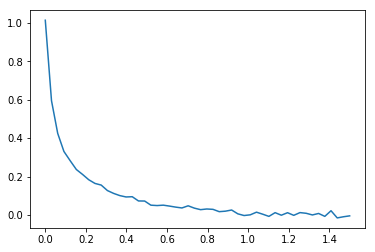

In [8]:
plt.plot(t,y)

## 2) Comparison of regularization strategies

###  Smoothness prior

Defintion of D

In [9]:
D = np.eye(N)

for n in range(N-1):
    D[n+1,n] = -1

D[0,N-1] = -1

$\underline{\textbf{Q3.}}$ Solving the optimization problem

In [170]:
beta = 1
x_hat = np.dot(np.linalg.inv(np.dot(K.T,K) + beta*np.dot(D.T,D)),np.dot(K.T,y))

In [171]:
def normalized_MSE(x,y):
    return( (np.linalg.norm(x-y)/np.linalg.norm(y))**2)

0.24453866628299645


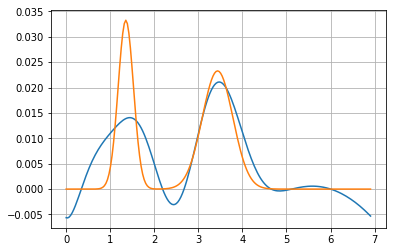

In [173]:
print(normalized_MSE(x_hat,x))
plt.plot(np.log(T),x_hat)
plt.plot(np.log(T),x)
plt.grid()

$\underline{\textbf{Q4.}}$ Tunning $\beta$ with a grid search 

MSE : 30.921915663400977, beta : 0.009999999999999995


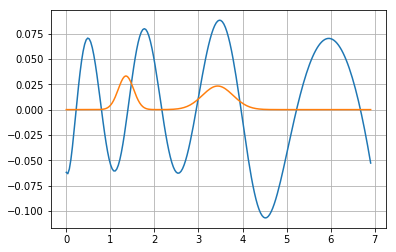

MSE : 3.8189557027880556, beta : 0.09999999999999998


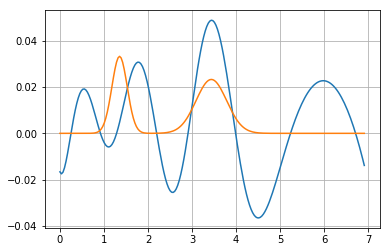

MSE : 0.24453866628299645, beta : 1.0


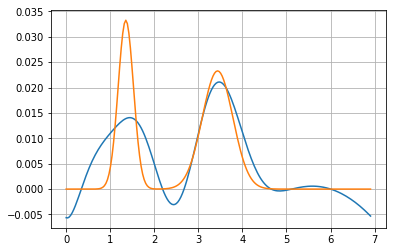

MSE : 0.41745862001506706, beta : 10.000000000000002


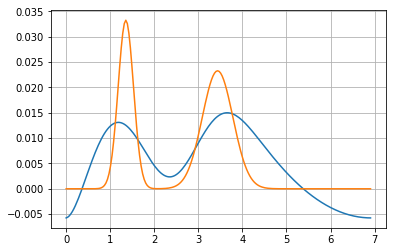

MSE : 0.4576900738601655, beta : 100.00000000000004


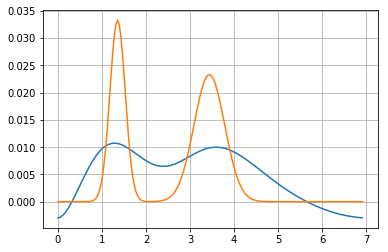

In [179]:
beta_grid = np.exp(np.log(10)*np.linspace(-2,2,5))
errors = np.zeros(beta_grid.shape[0])

for i in range(beta_grid.shape[0]):
    beta = beta_grid[i]
    x_hat = np.dot(np.linalg.inv(np.dot(K.T,K) + beta*np.dot(D.T,D)),np.dot(K.T,y))
    errors[i] = normalized_MSE(x_hat,x)
    print("MSE : {}, beta : {}".format(normalized_MSE(x_hat,x),beta))
    plt.plot(np.log(T),x_hat)
    plt.plot(np.log(T),x)
    plt.grid()
    plt.show()

### Smoothness prior + constraints 


0.002090379481739358
Objectif : 1e+30, ||Ku-y||^2 : 96.2444040191908, ||Du||^2 : 0.0, ind : 1e+30
Objectif : 409.12237480586066, ||Ku-y||^2 : 818.2446506725188, ||Du||^2 : 0.0009893920250080529, ind : 0
Objectif : 372.6407614573671, ||Ku-y||^2 : 745.2814111417002, ||Du||^2 : 0.0011177303400387206, ind : 0
Objectif : 363.0787095734233, ||Ku-y||^2 : 726.1573055556479, ||Du||^2 : 0.0011359119870588987, ind : 0
Objectif : 360.9299978826225, ||Ku-y||^2 : 721.859881547422, ||Du||^2 : 0.001142178230009499, ind : 0
Objectif : 360.4611133459638, ||Ku-y||^2 : 720.9221118625624, ||Du||^2 : 0.0011482936521258218, ind : 0
Objectif : 360.5187214852039, ||Ku-y||^2 : 721.0373275865585, ||Du||^2 : 0.0011538384931302108, ind : 0
Objectif : 360.78741096788053, ||Ku-y||^2 : 721.5747059658057, ||Du||^2 : 0.0011596995536745855, ind : 0
Objectif : 361.1736591614784, ||Ku-y||^2 : 722.3472017173378, ||Du||^2 : 0.0011660561891650846, ind : 0
Objectif : 361.5229108413659, ||Ku-y||^2 : 723.0457045042942, ||Du||^2

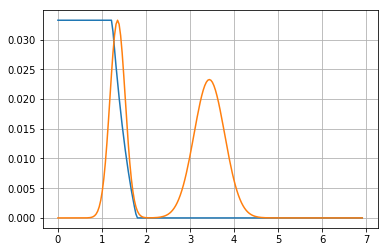

0.00209029733209514
Objectif : 1e+30, ||Ku-y||^2 : 96.2444040191908, ||Du||^2 : 0.0, ind : 1e+30
Objectif : 409.106730245837, ||Ku-y||^2 : 818.2124710951888, ||Du||^2 : 0.0009893964852521126, ind : 0
Objectif : 372.64290315684894, ||Ku-y||^2 : 745.2846924631491, ||Du||^2 : 0.0011138505488045983, ind : 0
Objectif : 363.076443840283, ||Ku-y||^2 : 726.1517517692591, ||Du||^2 : 0.0011359113068183568, ind : 0
Objectif : 360.92990638572235, ||Ku-y||^2 : 721.8586705945706, ||Du||^2 : 0.0011421768740385709, ind : 0
Objectif : 360.4622892890975, ||Ku-y||^2 : 720.9234302852311, ||Du||^2 : 0.0011482929639239129, ind : 0
Objectif : 360.5206418693241, ||Ku-y||^2 : 721.0401299015213, ||Du||^2 : 0.0011538371268789635, ind : 0
Objectif : 360.7899352559741, ||Ku-y||^2 : 721.5787108137305, ||Du||^2 : 0.0011596982177079348, ind : 0
Objectif : 361.1769086544763, ||Ku-y||^2 : 722.3526512551529, ||Du||^2 : 0.001166053799737073, ind : 0
Objectif : 361.526163057095, ||Ku-y||^2 : 723.0511543365762, ||Du||^2 : 

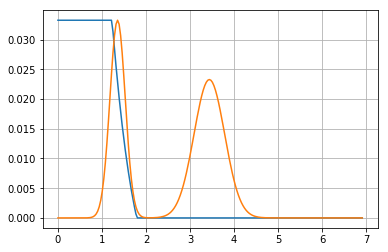

0.002089439935450034
Objectif : 1e+30, ||Ku-y||^2 : 96.2444040191908, ||Du||^2 : 0.0, ind : 1e+30
Objectif : 408.94327489321614, ||Ku-y||^2 : 817.8766553540216, ||Du||^2 : 0.0009894432410600435, ind : 0
Objectif : 372.66269932898064, ||Ku-y||^2 : 745.314640415232, ||Du||^2 : 0.0010758242729307635, ind : 0
Objectif : 363.0715951724844, ||Ku-y||^2 : 726.1320105318498, ||Du||^2 : 0.0011179813119060876, ind : 0
Objectif : 360.9213891368588, ||Ku-y||^2 : 721.8313566403616, ||Du||^2 : 0.001142163335603123, ind : 0
Objectif : 360.4697737494057, ||Ku-y||^2 : 720.928064628298, ||Du||^2 : 0.0011482870513461886, ind : 0
Objectif : 360.5370402259414, ||Ku-y||^2 : 721.0625422154517, ||Du||^2 : 0.001153823643111261, ind : 0
Objectif : 360.813255431276, ||Ku-y||^2 : 721.6149140134647, ||Du||^2 : 0.001159684908730827, ind : 0
Objectif : 361.208020824518, ||Ku-y||^2 : 722.4043813447503, ||Du||^2 : 0.0011660304285713947, ind : 0
Objectif : 361.55754513894465, ||Ku-y||^2 : 723.1033731859862, ||Du||^2 : 0

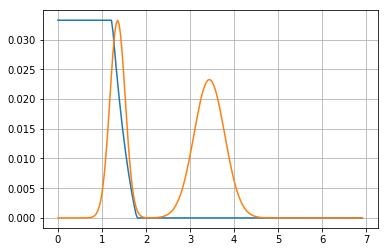

0.0020687936568564193
Objectif : 1e+30, ||Ku-y||^2 : 96.2444040191908, ||Du||^2 : 0.0, ind : 1e+30
Objectif : 404.95640829155843, ||Ku-y||^2 : 809.8137484162032, ||Du||^2 : 0.0009906816691367586, ind : 0
Objectif : 372.3562249932255, ||Ku-y||^2 : 744.6351451913557, ||Du||^2 : 0.0007730479509525488, ind : 0
Objectif : 363.21247415826855, ||Ku-y||^2 : 726.3573575184134, ||Du||^2 : 0.0006759079812370215, ind : 0
Objectif : 361.32599788202623, ||Ku-y||^2 : 722.5903200200906, ||Du||^2 : 0.0006167574396180805, ind : 0
Objectif : 361.058548403689, ||Ku-y||^2 : 722.0593142794015, ||Du||^2 : 0.0005778252797646341, ind : 0
Objectif : 361.2057861747596, ||Ku-y||^2 : 722.3564960246105, ||Du||^2 : 0.0005507632490881725, ind : 0
Objectif : 361.5652660971422, ||Ku-y||^2 : 723.0772086132763, ||Du||^2 : 0.0005332358100819284, ind : 0
Objectif : 362.0438942987191, ||Ku-y||^2 : 724.0355132253521, ||Du||^2 : 0.000522753720861602, ind : 0
Objectif : 362.361236436605, ||Ku-y||^2 : 724.6709825770779, ||Du||^

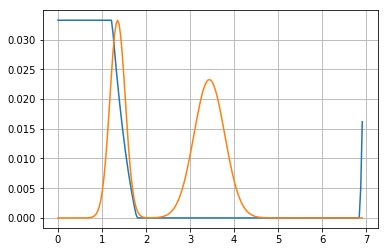

0.0002499985930847246
Objectif : 1e+30, ||Ku-y||^2 : 96.2444040191908, ||Du||^2 : 0.0, ind : 1e+30
Objectif : 41.80341541868581, ||Ku-y||^2 : 83.56853541329677, ||Du||^2 : 3.829542407485197e-05, ind : 0
Objectif : 51.198309121248954, ||Ku-y||^2 : 102.31537359400353, ||Du||^2 : 8.124464849438164e-05, ind : 0
Objectif : 70.87961625780405, ||Ku-y||^2 : 141.63481720498638, ||Du||^2 : 0.00012441531062170824, ind : 0
Objectif : 97.00695426204155, ||Ku-y||^2 : 193.8474626815497, ||Du||^2 : 0.00016644584253338893, ind : 0
Objectif : 126.82709050439404, ||Ku-y||^2 : 253.44764122813325, ||Du||^2 : 0.00020653978065483377, ind : 0
Objectif : 158.38275254227906, ||Ku-y||^2 : 316.5211907304443, ||Du||^2 : 0.0002443143541138141, ind : 0
Objectif : 190.30409202292287, ||Ku-y||^2 : 380.32854424566193, ||Du||^2 : 0.0002796398001837871, ind : 0
Objectif : 218.62681740469532, ||Ku-y||^2 : 436.94857452044255, ||Du||^2 : 0.00030506028894809143, ind : 0
Objectif : 239.7800648290059, ||Ku-y||^2 : 479.24934544

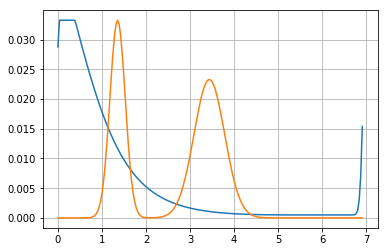

In [182]:
beta_grid = np.exp(np.log(10)*np.linspace(-1,3,5))

def proximal_gradient_smooth_cons(lamb,K,y,T,xmin,xmax,display = False):
    tol = 1e-4
    max_iter = 10
    nb_iter = 0
    m = K.shape[0]
    n = K.shape[1]
    u = np.zeros((n,1))
    w,v = np.linalg.eig(np.dot(K.T,K) + lamb * np.dot(D.T,D))
    L = max(w)
    epsilon = 1/L
    print(epsilon)
    
    #for i in range(n):
    #    u[i] = (random.random() - 0.5)
    norm2 = np.linalg.norm(np.dot(K,u) - y)
    normD = np.linalg.norm(np.dot(D,u))
    obj = 0.5 * norm2 **2 + 0.5 * lamb * normD ** 2 + ind(u,xmin,xmax)
    last_obj = 0
    if display:
        print("Objectif : {}, ||Ku-y||^2 : {}, ||Du||^2 : {}, ind : {}".format(obj,norm2**2,normD**2,ind(u,xmin,xmax)))
    
    while (abs(obj - last_obj) > tol and nb_iter < max_iter):
    #while obj>42 :
        w = u - epsilon * (np.dot(K.T,(np.dot(K,u) - y)) + lamb * np.dot(D.T,np.dot(D,u)))
        last_obj = obj
        u = prox_cons(w,xmin,xmax) 
        norm2 = np.linalg.norm(np.dot(K,u) - y)
        normD = np.linalg.norm(np.dot(D,u))
        obj = 0.5 * norm2 **2 + 0.5*lamb * normD ** 2 + ind(u,xmin,xmax)
        if display:
            print("Objectif : {}, ||Ku-y||^2 : {}, ||Du||^2 : {}, ind : {}".format(obj,norm2**2,normD**2,ind(u,xmin,xmax)))
        nb_iter += 1
        
    return u
        
def prox_cons(w,xmin,xmax):
    n = w.shape[0]
    out = np.zeros((n,1))
    for index in range(n):
        value = w[index,0]
        if value >  xmax:
            out[index,0] = xmax
        elif value <  xmin:
            out[index,0] = xmin
        elif value >= xmin and value <= xmax:
            out[index,0] = value
    #print(out)
    return out

def ind(x,xmin,xmax):
    n = x.shape[0]
    for i in range(n):
        if x[i] > xmax or x[i] < xmin:
            return 1e30
    return 0

for i in range(beta_grid.shape[0]):
    beta = beta_grid[i]
    x_hat = proximal_gradient_smooth_cons(beta,K,y,T,xmin,xmax,True) #,True
    print("MSE : {}, beta : {}\n".format(normalized_MSE(x_hat,x),beta))
    plt.plot(np.log(T),x_hat)
    plt.plot(np.log(T),x)
    plt.grid()
    plt.show()

In [164]:
print(prox_cons(np.ones((5,1)),1.5,2))

[[1.5]
 [1.5]
 [1.5]
 [1.5]
 [1.5]]


### Sparsity 


Objectif : 80.52095360570988, ||Ku-y||^2 : 161.0409020798522, ||u|| : 5.025657837699539
Objectif : 78.81701297148953, ||Ku-y||^2 : 157.6330210314366, ||u|| : 5.024557712300551
Objectif : 77.15955484647996, ||Ku-y||^2 : 154.3181050002022, ||u|| : 5.023463788669517
Objectif : 75.54799517538117, ||Ku-y||^2 : 151.0949858755551, ||u|| : 5.022376036208337
Objectif : 73.98175615254839, ||Ku-y||^2 : 147.96250804621187, ||u|| : 5.021294424466251
Objectif : 72.46026615909236, ||Ku-y||^2 : 144.91952827440008, ||u|| : 5.02021892313913
Objectif : 70.9829597005961, ||Ku-y||^2 : 141.96491557129178, ||u|| : 5.019149502068776
Objectif : 69.54927734544066, ||Ku-y||^2 : 139.09755107365507, ||u|| : 5.018086131242221
Objectif : 68.15866566373606, ||Ku-y||^2 : 136.31632792171595, ||u|| : 5.017028780791031
Objectif : 66.81057753704812, ||Ku-y||^2 : 133.62015184499992, ||u|| : 5.016145481576694
Objectif : 65.5044709978777, ||Ku-y||^2 : 131.0079388817648, ||u|| : 5.015569953038186
Objectif : 64.23981023095672,

Objectif : 65.3466654312047, ||Ku-y||^2 : 130.69232192696197, ||u|| : 5.044677237180892
Objectif : 66.19286190390031, ||Ku-y||^2 : 132.3847146902682, ||u|| : 5.045587662049877
MSE : 1931.8831169281143, beta : 9.999999999999991e-05


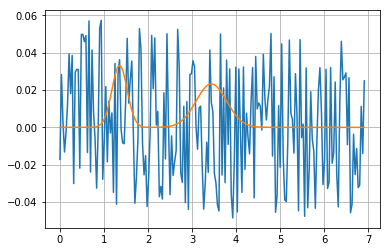

Objectif : 46.06009281194008, ||Ku-y||^2 : 92.10497125459159, ||u|| : 5.182714566010954
Objectif : 46.257892763775956, ||Ku-y||^2 : 92.50056634317224, ||u|| : 5.18435480770156
Objectif : 46.47584136537816, ||Ku-y||^2 : 92.93645875401347, ||u|| : 5.1859873072113105
Objectif : 46.71364459297913, ||Ku-y||^2 : 93.41206043947157, ||u|| : 5.1876121015365975
Objectif : 46.971011722611415, ||Ku-y||^2 : 93.92678995150355, ||u|| : 5.189229227496837
Objectif : 47.24765529622188, ||Ku-y||^2 : 94.48007237389554, ||u|| : 5.190838721735306
Objectif : 47.5432910881211, ||Ku-y||^2 : 95.07133925516167, ||u|| : 5.192440620719994
Objectif : 47.857638071764406, ||Ku-y||^2 : 95.70002854210604, ||u|| : 5.194034960744437
Objectif : 48.190418386861246, ||Ku-y||^2 : 96.36558451404153, ||u|| : 5.195621777928553
Objectif : 48.541357306810085, ||Ku-y||^2 : 97.06745771765951, ||u|| : 5.1972011082194705
Objectif : 48.91018320645519, ||Ku-y||^2 : 97.80510490254352, ||u|| : 5.198772987392361
Objectif : 49.296627530162

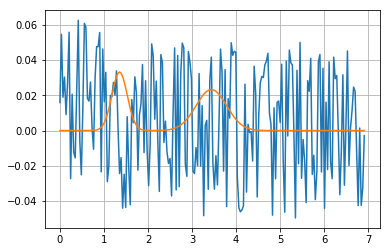

Objectif : 48.630042426186364, ||Ku-y||^2 : 97.03898319033054, ||u|| : 5.131315028141314
Objectif : 48.2355166605824, ||Ku-y||^2 : 96.249952169902, ||u|| : 5.130839015118264
Objectif : 47.869857646361645, ||Ku-y||^2 : 95.51865268190475, ||u|| : 5.130408729523104
Objectif : 47.532671492348896, ||Ku-y||^2 : 94.84429881932456, ||u|| : 5.129980648658307
Objectif : 47.22357052886792, ||Ku-y||^2 : 94.22611528651832, ||u|| : 5.129553758119259
Objectif : 46.94217136767918, ||Ku-y||^2 : 93.66333530725916, ||u|| : 5.129128052053618
Objectif : 46.68809483689194, ||Ku-y||^2 : 93.15520053801653, ||u|| : 5.1287035246374355
Objectif : 46.46096593803139, ||Ku-y||^2 : 92.70096098209054, ||u|| : 5.128280170075013
Objectif : 46.26041380352806, ||Ku-y||^2 : 92.29987490459077, ||u|| : 5.127857982598771
Objectif : 46.08607165462642, ||Ku-y||^2 : 91.95120874825348, ||u|| : 5.127436956469115
Objectif : 45.937576759707504, ||Ku-y||^2 : 91.65423705008682, ||u|| : 5.1270170859742965
Objectif : 45.81457039302242,

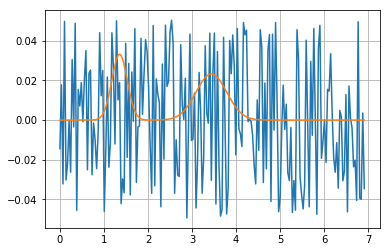

Objectif : 49.52626914948245, ||Ku-y||^2 : 95.82166236792555, ||u|| : 5.108463389750733
Objectif : 49.766615294892794, ||Ku-y||^2 : 96.30194697608508, ||u|| : 5.109107992636635
Objectif : 50.026137427533584, ||Ku-y||^2 : 96.82058758599898, ||u|| : 5.109746227812456
Objectif : 50.3043255296432, ||Ku-y||^2 : 97.37654322167967, ||u|| : 5.110411205059443
Objectif : 50.600851427153714, ||Ku-y||^2 : 97.96912125893773, ||u|| : 5.1111602818545245
Objectif : 50.91568916427303, ||Ku-y||^2 : 98.59831945080879, ||u|| : 5.111914931538813
Objectif : 51.248562525134666, ||Ku-y||^2 : 99.26359350042036, ||u|| : 5.112662291768527
Objectif : 51.59920244339463, ||Ku-y||^2 : 99.96440525239218, ||u|| : 5.113402398423302
Objectif : 51.967342891796285, ||Ku-y||^2 : 100.700222629628, ||u|| : 5.1141352872099475
Objectif : 52.352720850879415, ||Ku-y||^2 : 101.47051957073323, ||u|| : 5.11486099366326
Objectif : 52.7550762779987, ||Ku-y||^2 : 102.2747759680513, ||u|| : 5.115579553146859
Objectif : 53.1741520766491

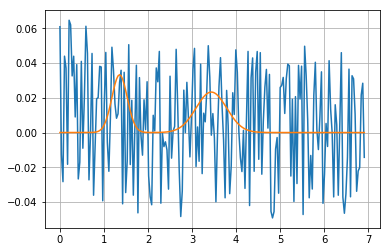

Objectif : 77.61957081377152, ||Ku-y||^2 : 108.45583587928013, ||u|| : 5.039578840921277
Objectif : 76.95886615934737, ||Ku-y||^2 : 107.2228142647124, ||u|| : 5.0300575651847765
Objectif : 76.32927827811453, ||Ku-y||^2 : 106.05202848839883, ||u|| : 5.020536042563901
Objectif : 75.73039379693604, ||Ku-y||^2 : 104.94265178285575, ||u|| : 5.011014275343397
Objectif : 75.16180385444115, ||Ku-y||^2 : 103.89386640424352, ||u|| : 5.001492265795994
Objectif : 74.62289609934336, ||Ku-y||^2 : 102.90395805072258, ||u|| : 4.9920227544039015
Objectif : 74.11342405846321, ||Ku-y||^2 : 101.97291339439862, ||u|| : 4.982554075834205
Objectif : 73.63299715649983, ||Ku-y||^2 : 101.09996203193626, ||u|| : 4.973085072372733
Objectif : 73.18122512516368, ||Ku-y||^2 : 100.28432340116487, ||u|| : 4.963615746776255
Objectif : 72.75772196971404, ||Ku-y||^2 : 99.52522548714495, ||u|| : 4.954146101787156
Objectif : 72.36210592552129, ||Ku-y||^2 : 98.82190473529208, ||u|| : 4.9446761401335095
Objectif : 71.9939994

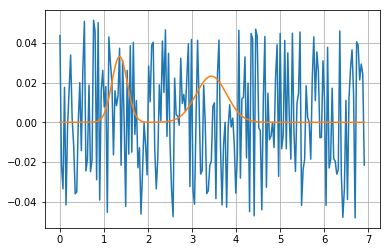

Objectif : 377.60539455168504, ||Ku-y||^2 : 101.40066703868199, ||u|| : 4.798310091652217
Objectif : 367.52567480224553, ||Ku-y||^2 : 99.66465542202725, ||u|| : 4.663100621889132
Objectif : 357.72593553495824, ||Ku-y||^2 : 98.16014254135592, ||u|| : 4.530301735216904
Objectif : 348.18859987886214, ||Ku-y||^2 : 96.84564600208978, ||u|| : 4.399959877594201
Objectif : 338.81377776526256, ||Ku-y||^2 : 95.58655383305309, ||u|| : 4.271596780087818
Objectif : 329.6527058550669, ||Ku-y||^2 : 94.41897303606699, ||u|| : 4.1456995048771645
Objectif : 320.61220775813524, ||Ku-y||^2 : 93.34227055285159, ||u|| : 4.020905055602567
Objectif : 311.71204436409977, ||Ku-y||^2 : 92.34412474021235, ||u|| : 3.8975939109516062
Objectif : 303.1098709241985, ||Ku-y||^2 : 91.45226582592426, ||u|| : 3.7778766215072275
Objectif : 294.79728654876976, ||Ku-y||^2 : 90.65631017398783, ||u|| : 3.6617060845390776
Objectif : 286.7448585817984, ||Ku-y||^2 : 89.98530565280252, ||u|| : 3.5484371055379116
Objectif : 278.857

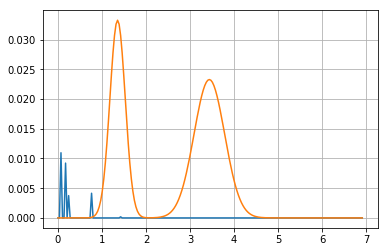

Objectif : 5101.786793822512, ||Ku-y||^2 : 92.57671977594504, ||u|| : 5.0554984339345355
Objectif : 3303.139966959528, ||Ku-y||^2 : 82.30039332065101, ||u|| : 3.2619897702992002
Objectif : 1898.8647136631264, ||Ku-y||^2 : 80.93507713688416, ||u|| : 1.858397175094683
Objectif : 878.880228811205, ||Ku-y||^2 : 85.51129243070865, ||u|| : 0.8361245825958501
Objectif : 247.472946002997, ||Ku-y||^2 : 92.4134271587446, ||u|| : 0.20126623242362457
Objectif : 48.1222020095954, ||Ku-y||^2 : 96.2444040191908, ||u|| : 0.0
Objectif : 48.1222020095954, ||Ku-y||^2 : 96.2444040191908, ||u|| : 0.0
MSE : 200.00000000000003, beta : 1000.0000000000007


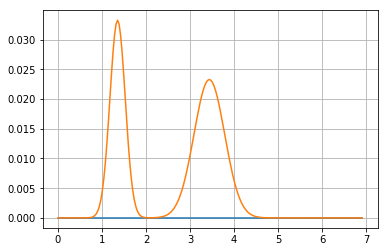

In [177]:
beta_grid = np.exp(np.log(10)*np.linspace(-4,3,7))

def proximal_gradient_norme1(lamb,K,y,T,display = False):
    tol = 1e-3
    max_iter = 100
    nb_iter = 0
    m = K.shape[0]
    n = K.shape[1]
    #print(np.dot(K.T,K))
    #w,v = np.linalg.eig(np.dot(K.T,K))
    #epsilon = 1/np.max(w)
    #print(epsilon)
    epsilon = 1e-5
    u = np.zeros((n,1))
    for i in range(n):
        u[i] = (random.random() - 0.5)/10
    norm2 = np.linalg.norm(np.dot(K,u) - y)
    norm1 = np.linalg.norm(u,1)
    obj = 0.5*norm2**2 + lamb * norm1
    last_obj = 0
    if display:
        print("Objectif : {}, ||Ku-y||^2 : {}, ||u|| : {}".format(obj,norm2**2,norm1))
    
    while abs(obj - last_obj) > tol and nb_iter < max_iter:
        w = u - epsilon * np.dot(K.T,(np.dot(K,u) - y))
        last_obj = obj
        u = prox_norme1(w,lamb,epsilon) 
        norm2 = np.linalg.norm(np.dot(K,u) - y)
        norm1 = np.linalg.norm(u,1)
        obj = 0.5*norm2**2 + lamb * norm1
        if display:
            print("Objectif : {}, ||Ku-y||^2 : {}, ||u|| : {}".format(obj,norm2**2,norm1))
        nb_iter += 1
    
    return u
        
def prox_norme1(w,lamb,epsilon):
    n = w.shape[0]
    out = np.zeros((n,1))
    for index in range(n):
        value = w[index,0]
        if value >  epsilon * lamb :
            out[index,0] = value - epsilon * lamb
        elif value <  -epsilon * lamb :
            out[index,0] = value + epsilon * lamb 
        elif value >=  -epsilon * lamb and value <= epsilon * lamb:
            out[index,0] = 0
    #print(out)
    return out

for i in range(beta_grid.shape[0]):
    beta = beta_grid[i]
    x_hat = proximal_gradient_norme1(beta,K,y,T,True)
    print("MSE : {}, beta : {}".format(normalized_MSE(x_hat,x),beta))
    plt.plot(np.log(T),x_hat)
    plt.plot(np.log(T),x)
    plt.grid()
    plt.show()